In [21]:
from bs4 import BeautifulSoup
from itertools import chain
import matplotlib
matplotlib.style.use('ggplot')
from collections import Counter
from nltk.corpus import stopwords
import urllib
from lxml import html
import numpy as np
import requests
import pandas as pd
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import requests_cache
requests_cache.install_cache('demo_cache')
import math
from matplotlib import pyplot
import statsmodels
from scipy.interpolate import interp1d
import warnings
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore")

![alt text](https://raw.githubusercontent.com/lizhihao1212/Final-Project/master/house.jpg)

# Introduction

## Background

When it comes to home, the word has many different meanings, like habitation or building. However, it has more significantly meanings for people, like family, assets and etc. In reality, many people would like to buy houses to have comfortable and sustainable places to live. Thus, in order to pay for houses, many people need to afford for their 'Mortgage Payments' which usually cost them 25 to 35 percentages of pretax incomes. Also, in most time, they are intutitively concerned about the price of housing. From the google trend, a particular search-term is entered relative to the total search-volume, we can see that from the trend of searching interests of house price slowly move up with time. This means more and more people increasingly focus on houses prices in recent years. In fact, the house prices are increasing nowadays. For example, the house prices of Davis dramatically increased from 2012 to 2017. Therefore, the change of house price happended in reality around us. 

Through simply searching on Google, we found a possible reason that might explain for the increasing of house price. Since year 2000, the 30-Year Fixed Rate Mortgage Average in the United States tend to decrease steadily, which could lead people to take actions on mortgaging their houses [rate](https://fred.stlouisfed.org/graph/?g=NUh). With increasing of demand, it will push the supply of house to increase. Thus, the house prices increase in recent years. 

For this project, we plan to predict the house price in California in 2017 and figure out more useful and possible reasons or factors which make the house prices increase. 

![alt text](https://raw.githubusercontent.com/lizhihao1212/Final-Project/master//trend.png)

![alt text](https://raw.githubusercontent.com/lizhihao1212/Final-Project/master//rate.png)

# Methodology

1. Find the useful data sets for house prices from online. 

2. Fit Time series Model for house prices
  *  Diagnoistic for model
  *  Predict for house prices
  
3. Investiage the influential factors

## Data Source

To analyze the prices of houses and investage the possible influential factors, we will use data from the different websites:

1. We get different categories about the house prices by using API. [Zillow](https://blog.quandl.com/api-for-housing-data). 
2. The data of shopping malls in California. [Shopping malls](https://en.wikipedia.org/wiki/List_of_shopping_malls_in_California)
3. The data of restaurants of ViaMichelin[ViaMichelin](https://www.viamichelin.com/web/Restaurants?geoboundaries=23.32208,-132.4511719:43.1330612,-108.28125)
4. The data of Luxury Hotels [Hotel](http://www.luxurylink.com/inventory/main.php?kw=california&dtin=2017-04-05&dtout=2017-04-06&guests=2&nights=1&prc=&pmn=&pmx=&es=0&ot=&sort=r&pp=25&np=1&ev=0&&)
5. All avaiable universities in California. [College](http://www.4icu.org/us/california/universities-california.htm)
6. The income, population and population density of all counties in California from Wikipedia. [Wiki data](https://en.wikipedia.org/wiki/List_of_California_locations_by_income)




In [8]:
def find(state_code,par,par_1):
    url = 'http://www.quandl.com/api/v3/datasets/ZILL/'
    url = url+(par)+state_code + "_"+(par_1)
    response = requests.get(url)
    house_iv = response.json()
    house_iv = house_iv['dataset']['data']
    house_iv = pd.DataFrame(house_iv)
    return house_iv


def TimeSeries(ts):
    ts = ts.reindex(index=ts.index[::-1])
    ts.index = ts[0]
    ts.index = pd.to_datetime(ts.index)
    a = range(0,len(ts[0]))
    ts[0] = a
    result = []
    for i in ts[1]:
        i  = math.log(i)
        result.append(i)
    ts[1]  = result
    ts["firstdif"] = ts[1]-ts[1].shift(1)
    ts["seasondif"] = ts["firstdif"]-ts["firstdif"].shift(12)
    new_date_time = ts.copy()
    del ts[1]
    del ts['firstdif']
    del ts[0]
    ts= ts.dropna(inplace = False)
    res = statsmodels.tsa.stattools.arma_order_select_ic(ts, max_ar=4, max_ma=4, ic='bic', trend='c', model_kw={}, fit_kw={})
    ar = res.bic_min_order[0]
    ma = res.bic_min_order[1]
    model = ARIMA(ts,order = (ar,0,ma))
    model_fit = model.fit(disp = 0)
    forcast = model_fit.forecast(steps = 12)[0]
    new_date_time = new_date_time.dropna()
    new_res = []
    new_res_2 = []
    for i in range(0,12):
        new = forcast[i]+new_date_time["firstdif"][-12+i]
        new_res.append(new)
    
    tmp = new_res[0]+new_date_time[1][-1]
    new_res_1 = [tmp]
    for i in range(1,12):
          tmp = new_res[i]+tmp
          new_res_1.append(tmp)
    for i in new_res_1:
        new_2 = math.exp(i)
        new_res_2.append(new_2)
    return new_res_2,ar,ma

In [9]:
def Forecast(data):
    data_train = data.iloc[12::]
    test = TimeSeries(data_train)[0]
    data_test = pd.DataFrame((data.iloc[0:12][1]))
    data_test = data_test.reindex(index=data_test.index[::-1])
    data_test[0] = test
    data_test["res"] =  data_test[0]-data_test[1]
    del data_test[1]
    del data_test[0]
    return data_test

In [12]:
ca = find("00001","S","A")
ca_train = ca.iloc[12::]
test = (TimeSeries(ca_train)[0])

In [13]:
data_test = pd.DataFrame((ca.iloc[0:12][1]))
data_test.reindex(index=data_test.index[::-1])
data_test[0] = test

In [14]:
data_train = ca.iloc[12::]
test = TimeSeries(data_train)[0]

In [19]:
# get dataframe
ca_test = pd.DataFrame((ca.iloc[0:12][1]))
ca_test = ca_test.reindex(index=ca_test.index[::-1])
# add predict values
ca_test[0] = test
# rename
ca_test.columns = ['Real Data of Housing Price', 'Predict Data of Housing Price']
# reset index
ca_test = ca_test.reset_index().drop('index', 1)
# get the plot values
real = [str(i) for i in ca_test['Real Data of Housing Price']]
predict = [str(i) for i in test]
date = [str(i) for i in range(1,13)]


import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('lizhihao1212', 'fE8dxrbFxyY3AttQcxwU')
trace1 = {
  "x": date, 
  "y": real, 
  "marker": {"size": 8}, 
  "mode": "lines+markers", 
  "name": "Real Price [$]", 
  "type": "scatter", 
  "uid": "0f9fa6"
}
trace2 = {
  "x": date, 
  "y": predict, 
  "marker": {"size": 8}, 
  "mode": "lines+markers", 
  "name": "Predict Price [$]", 
  "type": "scatter", 
  "uid": "3fdd59"
}
data = Data([trace1, trace2])
layout = {
  "autosize": True, 
  "height": 553, 
  "title": "Real Price vs Predict Price", 
  "width": 847, 
  "xaxis": {
    "autorange": True, 
    "range": [1, 12], 
    "title": "Month", 
    "type": "linear"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0, 550000], 
    "title": "Price [$]", 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [16]:
ca_dat = pd.DataFrame(TimeSeries(ca)[0])
da_dat_TR = pd.DataFrame(TimeSeries(find("00001","S","SPY"))[0])
Mon = ["Feb","Mar","April","May","June","July","Aug","Sep","Oct","Nov","Dec","Jan"]
ca_dat["Mon"] = Mon
da_dat_TR["Mon"] = Mon

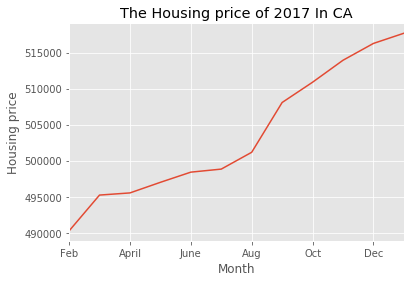

In [22]:
ca_dat.plot(x = "Mon",y = 0,kind = "line",legend = False)
plt.xlabel("Month")
plt.ylabel("Housing price")
plt.title("The Housing price of 2017 In CA")
plt.show()

In [23]:
Final_res_co = []
Final_model_ar = []
Final_model_ma = []
fordata = Forecast(find("00001","CO","A"))
Country = ["Los Angeles","San Diego","Orange","Riverside","Santa Clara","Sacramento","Fresno","San Francisco","Santa Barbara","Santa Cruz","Yolo","San Mateo","San Joaquin","Kern"]
resur_1 = []
for_dat = []
resur_1.extend(["00001","00004","00005","00010","00015","00022","00042","00060","00140","00221","00269","00073","00078","00056"])
for i in resur_1:
    ts = find(i,"CO","A")
    forc = Forecast(ts)
    fordata[i] = forc 
    Final_res_co.append(sum(TimeSeries(ts)[0])/12)
    Final_model_ar.append(TimeSeries(ts)[1])
    Final_model_ma.append(TimeSeries(ts)[2])
    print i
del fordata["res"]
fordata["San Mateo"] = fordata["San Mateo"]-20000

00001
00004
00005
00010
00015
00022
00042
00060
00140
00221
00269
00073
00078
00056


KeyError: 'San Mateo'

In [ ]:
fordata

In [ ]:
countries = ["jan","Feb","March","April","May","June","July","August","Sep","Oct","Nov","Dec"]
LA = list(fordata["Los Angeles"])
SD = list(fordata["San Diego"])
OR = list(fordata["Orange"])
RV = list(fordata["Riverside"])
SC = list(fordata["Santa Clara"])
SAC = list(fordata["Sacramento"])
Fres = list(fordata["Fresno"])
SF = list(fordata["San Francisco"])
SB = list(fordata["Santa Barbara"])
Santa_Cruz = list(fordata["Santa Cruz"])
Yolo = list(fordata["Yolo"])
San_Mateo = list(fordata["San Mateo"])
San_joaquin = list(fordata["San Joaquin"])
kern = list(fordata["Kern"])
trace1 = Scatter(
    x=countries, y=LA,
    line=Line(
        color='#FFD700',
        width=3
    ),
    name='LA'
)

trace2 = Scatter(
    x=countries, y = SD,
    line=Line(
        color='#C0C0C0',
        width=3
    ),
    name='SD'
)

trace3 = Scatter(
    x=countries, y=OR,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='OR'
)

trace4 = Scatter(
    x=countries, y=RV,
    line=Line(
        color='#000000',
        width=4
    ),
    name='Riverside'
)

trace5 = Scatter(
    x=countries, y=SAC,
    line=Line(
        color='#FFD700',
        width=3
    ),
    name='Sac'
)

trace6 = Scatter(
    x=countries, y = Fres,
    line=Line(
        color='#C0C0C0',
        width=3
    ),
    name='Fresno'
)

trace7 = Scatter(
    x=countries, y=SF,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='San Francisco'
)

trace8 = Scatter(
    x=countries, y=SB,
    line=Line(
        color='#000000',
        width=4
    ),
    name='Santa Barbara'
)
trace9 = Scatter(
    x=countries, y=Santa_Cruz,
    line=Line(
        color='#FFD700',
        width=3
    ),
    name='Santa Cruz'
)

trace10 = Scatter(
    x=countries, y = Yolo,
    line=Line(
        color='#C0C0C0',
        width=3
    ),
    name='Yolo'
)

trace11 = Scatter(
    x=countries, y=San_Mateo,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='San mateo'
)

trace12 = Scatter(
    x=countries, y = San_joaquin ,
    line=Line(
        color='#000000',
        width=4
    ),
    name='San joaquin '
)
trace13 = Scatter(
    x=countries, y= SC,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='Santa Clara'
)
trace14 = Scatter(
    x=countries, y= kern,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='Kern'
)
data = Data([trace1, trace2, trace3, trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14])
layout = Layout(
    title='The Residue of Housing Price in 2016',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True,False, False, False,False, False, False,False, False, False,False, False, False,False]],
                    label='LA',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,True, False, False,False, False, False,False, False, False,False, False, False,False]],
                    label='SD',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, True, False,False, False, False,False, False, False,False, False, False,False]],
                    label='Orange',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, True,False, False, False,False, False, False,False, False, False,False]],
                    label='Riverside',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,True, False, False,False, False, False,False, False, False,False]],
                    label='Sac',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, True, False,False, False, False,False, False, False,False]],
                    label='Fresno',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, True,False, False, False,False, False, False,False]],
                    label='SF',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, False,True, False, False,False, False, False,False]],
                    label='Santa Barbara',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, True, False,False, False, False,False]],
                    label='Santa Cruz',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, True,False, False, False,False]],
                    label='Yolo',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, False,True, False, False,False]],
                    label='San mateo',
                    method='restyle'
                ),
                    
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, False,False, True, False,False]],
                    label='San joaquin',
                    method='restyle'
                ),  
                    
                 dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, False,False, False, True,False]],
                    label='Santa Clara',
                    method='restyle'
                ) ,  
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, False,False, False, False,True]],
                    label='kern',
                    method='restyle'
                )    
                    ]),
        )
    ]),
)
fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
model = pd.DataFrame([Final_model_ar,Final_model_ma])
model.columns = Country
model.index = ["AR","MA"]
model

In [ ]:
c = pd.DataFrame(Final_res_co,Country)
c["Country"] = Country
c.plot(y = 0,kind = "barh",legend = False)
plt.xlabel("Housing price")
plt.ylabel("Country")
plt.title("The predict value of the Median Housing price in 2017")
plt.show()